In [24]:
import mmcv
from mmcv import *
from mmcv.runner import load_checkpoint
from mmdet.models import build_detector
from mmdet.apis import inference_detector, show_result
from mmdet.datasets import to_tensor
from mmdet.datasets.transforms import ImageTransform
from mmdet.core import get_classes
import numpy as np
import matplotlib.pyplot as plt


import argparse
from mmcv import Config
from mmcv.runner import obj_from_dict

from mmdet import datasets, __version__
from mmdet.apis import (train_detector, init_dist, get_root_logger,
                        set_random_seed)
from mmdet.models import build_detector
import matplotlib.pyplot
%matplotlib inline

In [67]:
#noblank for traning
def sliding_window(image, stride=500, window_size=(756,756)):
    patches = []
    # slide a window across the image
    for x in range(0, image.shape[0], stride):
        for y in range(0, image.shape[1], stride):
            new_patch = image[x:x + window_size[0], y:y + window_size[1]]
#             print(new_patch.shape[:2])
            if new_patch.shape[0]>300 and new_patch.shape[1]>300 :
                if (new_patch[:,:,-1].max()>0):
                    patches.append(new_patch)
#             else:
#                 print(new_patch.shape)
    return patches

In [84]:
import glob
from skimage import io
from skimage.transform import resize
import tqdm

# Buile sample for training

In [105]:
paths='/data2/rice/old/*.jpg'
jpgs=[]
for path in tqdm.tqdm(glob.glob(paths)):
#     print(path)
    data=io.imread(path)
    data=data[0]
    data=resize(data,(int(data.shape[0]/4),int(data.shape[1]/4)))
#     print(data.shape)
    patches=sliding_window(data)
    jpgs.extend(patches)
#     break
    


  0%|          | 0/242 [00:00<?, ?it/s]/home/user/miniconda2/envs/py3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "

100%|██████████| 242/242 [04:35<00:00,  1.13s/it]


In [107]:
for i in tqdm.tqdm(range(len(jpgs))):
    filename='/data2/rice/rice/'+'%06d'%(i+1)+'.jpg'
    io.imsave(filename,jpgs[i])
#     break

  0%|          | 0/726 [00:00<?, ?it/s]/home/user/miniconda2/envs/py3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
100%|██████████| 726/726 [00:31<00:00, 23.18it/s]


# 图像识别法

In [222]:
img='/data2/rice/old/000005.jpg'

In [239]:
imgdata=io.imread(img)

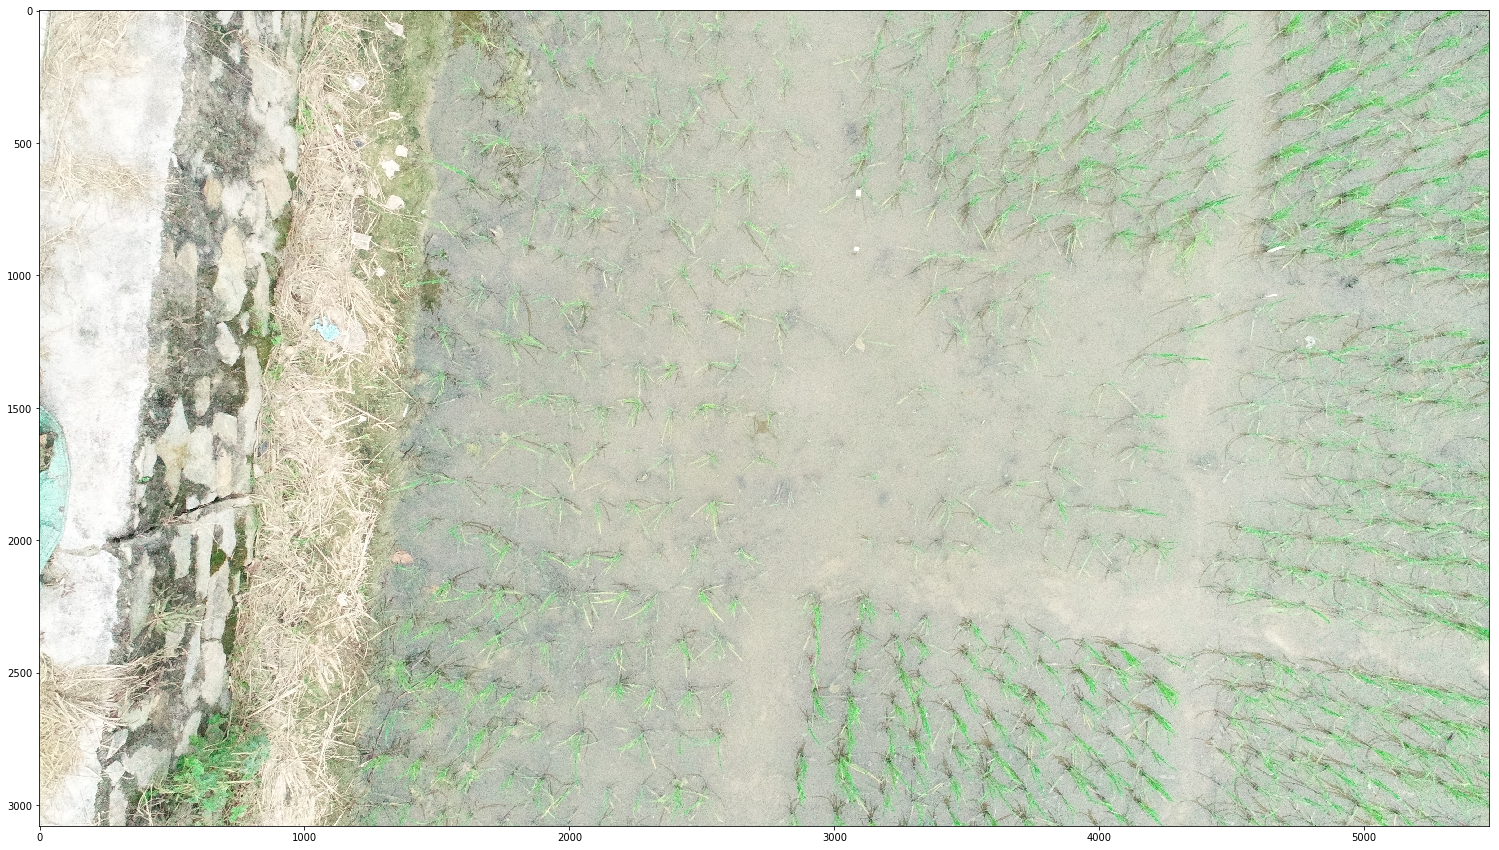

In [156]:
plt.figure(figsize=(30,15))
plt.imshow(imgdata[0])

In [205]:
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
from sklearn.cluster import KMeans

In [240]:
imgdata=imgdata[0]

In [241]:
#resize 
w, h, d= tuple(imgdata.shape)
imgdata=resize(imgdata,(int(w/4),int(h/4)))

/home/user/miniconda2/envs/py3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [243]:
# Crop
cropdata=imgdata[:,600:]

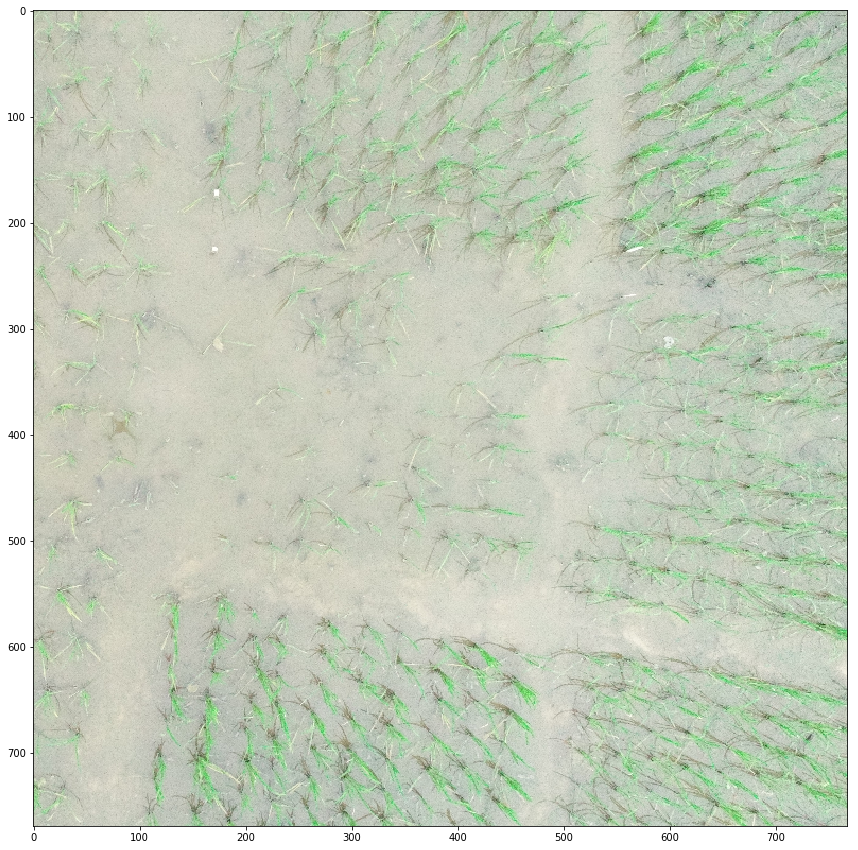

In [244]:
plt.figure(figsize=(30,15))
plt.imshow(cropdata)

In [245]:
w, h, d= tuple(cropdata.shape)
cluster=cropdata.reshape(w*h,d)

In [246]:
cluster.shape

(590592, 3)

In [247]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(cluster)

In [271]:
labels = kmeans.predict(cluster)

In [272]:
labels=labels.reshape(w,h)

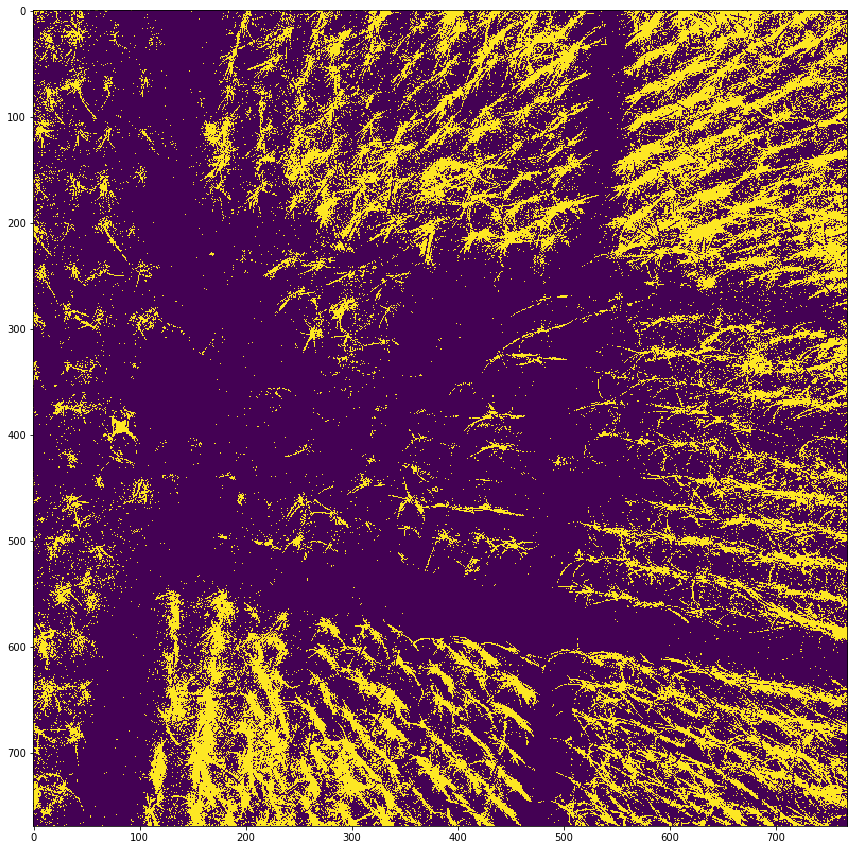

In [280]:
plt.figure(figsize=(30,15))
plt.imshow(np.logical_or(labels==1,labels==2))

In [281]:
testnew=np.logical_or(labels==1,labels==2)

In [255]:
from skimage.morphology import *

In [282]:
testnew=testnew.astype(np.bool)

In [294]:
testnew=remove_small_holes(testnew,5)

In [306]:
testnewV1=remove_small_objects(testnew,40)

In [308]:
testnewV2=binary_opening(testnewV1,square(3))

In [314]:

testnewV3=remove_small_objects(testnewV2,5)

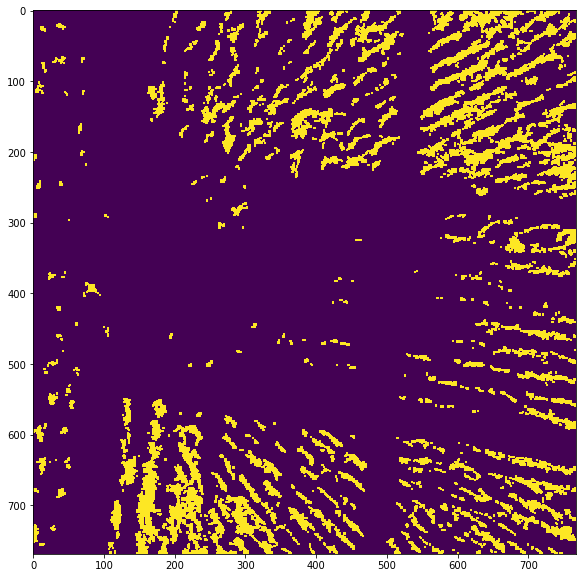

In [315]:
plt.figure(figsize=(10,10))
plt.imshow(testnewV3)